In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import os
import csv
import re
pd.set_option('display.max_colwidth', None)

In [2]:
#get east-coast data
df_wp = pd.read_csv('news/east-coast/dc/articles.csv')
df_md = pd.read_csv('news/east-coast/md/articles.csv')
df_nyt = pd.read_csv('news/east-coast/nyc/articles.csv')
#get west-coast data
df_la = pd.read_csv('news/west-coast/la/articles.csv')
df_sf = pd.read_csv('news/west-coast/sf/articles.csv')
df_ws = pd.read_csv('news/west-coast/ws/articles.csv')
#get mid-west data
df_cst = pd.read_csv('news/mid-west/chicago/articles.csv')
df_mst = pd.read_csv('news/mid-west/minneapolis/articles.csv')
df_dn = pd.read_csv('news/mid-west/dallas/articles.csv')
df_hc = pd.read_csv('news/mid-west/houston/articles.csv')

#### will compare the sentiment of the three regions

In [3]:
west_coast_df = pd.concat([df_la, df_sf, df_ws], axis=0).reset_index(drop = True)
east_coast_df = pd.concat([df_wp, df_md, df_nyt], axis=0).reset_index(drop = True)
mid_west_df = pd.concat([df_cst, df_mst, df_dn, df_hc], axis=0).reset_index(drop = True)

In [4]:
# removing speacial characters,symbols, white spaces without altering the decimal numbers
mid_west_df['article'] = mid_west_df['article'].apply(lambda text: ' '.join(re.sub(r'[^a-zA-Z0-9\s.]', '', text).split()))
east_coast_df['article'] = east_coast_df['article'].apply(lambda text: ' '.join(re.sub(r'[^a-zA-Z0-9\s.]', '', text).split()))
west_coast_df['article'] = west_coast_df['article'].apply(lambda text: ' '.join(re.sub(r'[^a-zA-Z0-9\s.]', '', text).split()))


In [5]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\blahb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\blahb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\blahb\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\blahb\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter

In [7]:
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)

    # Removing stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

    # Stemming (using Porter Stemmer)
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in stemmed_tokens]

    return ' '.join(filtered_tokens)


mid_west_df['article'] = mid_west_df['article'].apply(preprocess_text)
east_coast_df['article'] = east_coast_df['article'].apply(preprocess_text)
west_coast_df['article'] = west_coast_df['article'].apply(preprocess_text)

In [8]:
import contractions
from word2number import w2n
import unicodedata
from spellchecker import SpellChecker

def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    text =  url.sub(r'',text)
    return text

def strip_html_tags(text):
    """remove html tags from text"""
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text(separator=" ")
    return stripped_text

def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

def remove_special_characters(text):
    text = re.sub('[^a-zA-z0-9\s]', '', text)
    return text
    
# Extra white spaces
def remove_whitespace(text):
    """remove extra whitespaces from text"""
    text = text.strip()
    return " ".join(text.split())

def expand_text(text):
    # creating an empty list
    expanded_words = []   
    for word in text.split():
        # using contractions.fix to expand the shortened words
        expanded_words.append(contractions.fix(word))  
       
    expanded_text = ' '.join(expanded_words)
    return expanded_text

def word_to_number(text):
    res = w2n.word_to_num(test_str)
    return res

def correct_spellings(text):
    spell = SpellChecker()
    
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word is None or word == "":
            continue
        elif word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)


def remove_stopwords(sentence, word_tokens):
    my_stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
    tokens = sentence.split(" ")
    tokens_filtered= [word for word in word_tokens if not word in my_stopwords]
    return (" ").join(tokens_filtered)

In [9]:
def normalize_doc(doc, URL_stripping=True, html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True , emoji_removal=True,
                     spelling_correction = True, word_to_num=False):
    
    
    normalized_document = []
    # Stip URL's
    if URL_stripping:
        doc = remove_URL(doc)
    # strip HTML
    if html_stripping:
        doc = strip_html_tags(doc)
    # remove accented characters
    if accented_char_removal:
        doc = remove_accented_chars(doc)
    # expand contractions    
    if contraction_expansion:
        doc = expand_text(doc)
    # lowercase the text    
    if text_lower_case:
        doc = doc.lower()
    # Word to numbers
    if word_to_num:
        doc = word_to_num(doc)
    # remove extra newlines
    doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
    # remove special characters    
    if special_char_removal:
        doc = remove_special_characters(doc)
    # remove stopwords
    if stopword_removal:
        text_tokens = word_tokenize(doc)
        doc = remove_stopwords(doc, text_tokens)
    
    # remove extra whitespace
    doc = re.sub(' +', ' ', doc)
    
    normalized_document.append(doc)
    return doc

In [10]:
mid_west_df['article'] = mid_west_df['article'].apply(lambda x: normalize_doc(x))
east_coast_df['article'] = east_coast_df['article'].apply(lambda x: normalize_doc(x))
west_coast_df['article'] = west_coast_df['article'].apply(lambda x: normalize_doc(x))

In [11]:
mid_west_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        15 non-null     object
 1   article      15 non-null     object
 2   date         15 non-null     object
 3   news_source  15 non-null     object
 4   region       15 non-null     object
dtypes: object(5)
memory usage: 728.0+ bytes


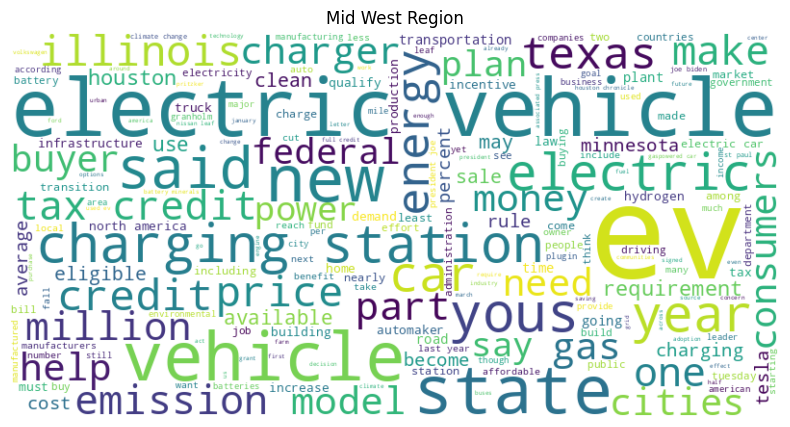

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all the preprocessed text into a single string
combined_text = ' '.join(mid_west_df['article'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

# Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.title("Mid West Region")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


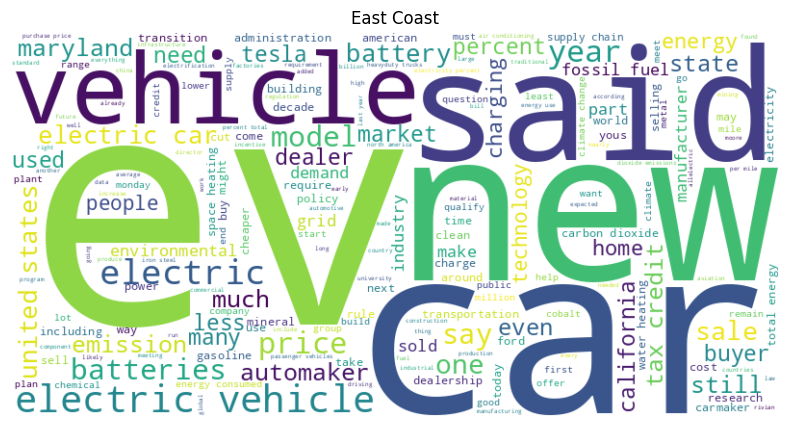

In [13]:
combined_text = ' '.join(east_coast_df['article'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

# west_coast_df
# Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.title("East Coast")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


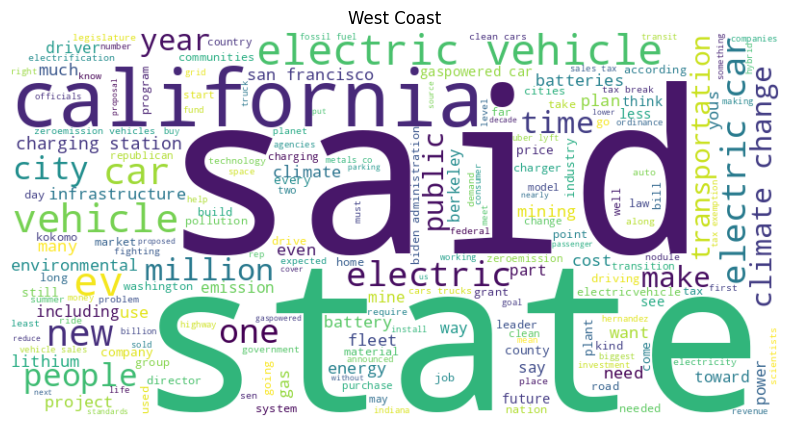

In [14]:

combined_text = ' '.join(west_coast_df['article'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

# west_coast_df
# Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.title("West Coast")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [15]:
mid_west_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        15 non-null     object
 1   article      15 non-null     object
 2   date         15 non-null     object
 3   news_source  15 non-null     object
 4   region       15 non-null     object
dtypes: object(5)
memory usage: 728.0+ bytes


## Date cleaning

#### Mid West Region

In [16]:
from datetime import datetime

def convert_date(date_str):
    # Define different date formats
    formats = [
        "%Y-%m-%d %H:%M:%S",  # 2021-04-05 12:30:27
        "%I:%M %p on %b %d, %Y %Z",  # 5:38 AM on Dec 28, 2022 CST
        "%B %d, %Y",  # June 15, 2017
        "%b. %d, %Y",  # Jan. 20, 2023
        "%B %d, %Y"  # July 3, 2023
    ]

    for fmt in formats:
        try:
            # Try to parse the date string with each format
            dt = datetime.strptime(date_str, fmt)
            return dt.strftime("%m-%d-%Y")
        except ValueError:
            continue

    # If no format matches, return the original string or a placeholder
    return date_str

def custom_date_parser_mid_west(date_str):
    # Check if the date matches the specific pattern
    match = re.match(r'(\d+:\d+\s[APM]{2})\son\s([A-Za-z]+\s\d+,\s\d{4})\s[A-Z]{3}', date_str)
    if match:
        # Extract the time and date parts
        time_part = match.group(1)
        date_part = match.group(2)

        # Combine and parse the date
        full_date_str = f'{date_part} {time_part}'
        parsed_date = datetime.strptime(full_date_str, "%b %d, %Y %I:%M %p")
        return parsed_date.strftime("%m-%d-%Y")
    else:
        # Handle other date formats here, or return a placeholder
        return date_str
        
mid_west_df['converted_date'] = mid_west_df['date'].apply(convert_date)
mid_west_df['converted_date'] = mid_west_df['converted_date'].apply(custom_date_parser_mid_west)

#### East coast Date cleaning

In [17]:
east_coast_df['date'].iloc[3] = east_coast_df['date'][3].split('|')[1]
east_coast_df['date'].iloc[3] = east_coast_df['date'].iloc[3].replace('Published ', '')
east_coast_df['date'].iloc[10] = east_coast_df['date'].iloc[10][east_coast_df['date'].iloc[10].find('Updated') + len('Updated'): ]
east_coast_df['date'].iloc[13] = east_coast_df['date'].iloc[13][east_coast_df['date'].iloc[13].find('Updated') + len('Updated'): ]

In [18]:
def convert_to_standard_format(date_str):
    # Remove words like 'Published' and 'at', and timezone information
    cleaned_date_str = re.sub(r'(Published\s+|\sat\s+|\s+[A-Z]{3})', ' ', date_str).strip()

    # Define date formats to try
    formats = [
        "%Y-%m-%d %H:%M:%S",   # 2022-08-09 10:54:00
        "%B %d, %Y",           # June 23, 2023
        "%b. %d, %Y",          # Jan. 15, 2021
        "%b %d, %Y"            # Aug. 9, 2022
    ]

    for fmt in formats:
        try:
            parsed_date = datetime.strptime(cleaned_date_str, fmt)
            return parsed_date.strftime("%m-%d-%Y")
        except ValueError:
            continue

    # Return a placeholder if no format matches
    return date_str

def custom_date_parser_east_coast(date_str):
    # Extract the date and time components without the timezone
    match = re.match(r'(\w+ \d+, \d+) at (\d+:\d+ [apm.]+)', date_str)
    if not match:
        return date_str

    date_part, time_part = match.groups()

    # Remove periods from the time part (for 'a.m.' and 'p.m.')
    time_part = time_part.replace('.', '')

    # Combine the date and time parts and parse
    full_date_str = f'{date_part} {time_part}'
    parsed_date = datetime.strptime(full_date_str, "%B %d, %Y %I:%M %p")
    return parsed_date.strftime("%m-%d-%Y")
    
east_coast_df['converted_date'] = east_coast_df['date'].apply(lambda x: convert_to_standard_format(x))
east_coast_df['converted_date'] = east_coast_df['converted_date'].apply(custom_date_parser_east_coast)

In [19]:
east_coast_df['converted_date']

0     09-19-2023
1     05-17-2023
2     04-11-2023
3     11-09-2023
4     06-13-2023
5     08-09-2022
6     08-16-2022
7     04-20-2022
8     12-14-2022
9     03-13-2023
10    06-23-2023
11    01-15-2021
12    04-14-2023
13    08-09-2022
14    11-07-2023
Name: converted_date, dtype: object

#### West coast date cleaning

In [20]:
west_coast_df['date'] = west_coast_df['date'].apply(lambda x: x.strip())

In [21]:
def convert_date_format(date_str):
    # Remove timezone and time, if present
    date_str = re.sub(r'(\d{1,2}:\d{2} [APM]{2} [A-Z]{2}| \d{1,2} [APM]{2} [A-Z]{2})', '', date_str).strip()

    # Define date formats
    formats = [
        "%b. %d, %Y",  # "Sept. 17, 2022"
        "%B %d, %Y",   # "March 21, 2019"
    ]

    for fmt in formats:
        try:
            parsed_date = datetime.strptime(date_str, fmt)
            return parsed_date.strftime("%m-%d-%Y")
        except ValueError:
            continue

    # Return a placeholder if no format matches
    return date_str


west_coast_df['converted_date'] = west_coast_df['date'].apply(lambda x: convert_date_format(x))

In [22]:
import re
from datetime import datetime

def custom_date_parser_regex(date_str):
    # Mapping for extended month abbreviations to standard three-letter abbreviations
    month_mapping = {
        'Jan.': 'Jan', 'Feb.': 'Feb', 'Mar.': 'Mar', 'Apr.': 'Apr', 'May.': 'May',
        'Jun.': 'Jun', 'Jul.': 'Jul', 'Aug.': 'Aug', 'Sep.': 'Sep', 'Sept.': 'Sep',
        'Oct.': 'Oct', 'Nov.': 'Nov', 'Dec.': 'Dec'
    }

    # Define the regex pattern for the date format
    pattern = r'([A-Za-z]+\.?) (\d{1,2}), (\d{4})'
    match = re.match(pattern, date_str)

    if match:
        month_abbr, day, year = match.groups()

        # Convert month abbreviation to a standard three-letter abbreviation
        month_std_abbr = month_mapping.get(month_abbr, None)
        if not month_std_abbr:
            return date_str

        # Parse the date using the standard abbreviation
        try:
            parsed_date = datetime.strptime(f"{month_std_abbr} {day} {year}", "%b %d %Y")
            return parsed_date.strftime("%m-%d-%Y")
        except ValueError:
            return date_str
    else:
        return date_str

west_coast_df['converted_date'] = west_coast_df['converted_date'].apply(lambda x: custom_date_parser_regex(x))


In [23]:
west_coast_df.drop('date', axis=1, inplace=True)
east_coast_df.drop('date', axis=1, inplace=True)
mid_west_df.drop('date', axis=1, inplace=True)